In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import numpy as np
import os
import random

warnings.filterwarnings('ignore')

## washington

In [2]:
wa_reg = pd.read_csv(os.path.realpath(os.path.join(os.getcwd(), '..', 'Data/wa_new_ev_registrations.csv.gz')))
print(wa_reg.shape[0])
wa_reg = wa_reg[wa_reg['State of Residence'] == 'WA']
print(wa_reg.shape[0])
wa_reg = wa_reg[['Clean Alternative Fuel Vehicle Type', 'VIN (1-10)', 'Model Year',
       'Make', 'Model', 'New or Used Vehicle', 'Sale Price',
       'DOL Transaction Date', 'Transaction Type', 'Transaction Year', 'County', 'City', 'Postal Code',
       'Electric Range', 'Base MSRP', 'Sale Date', 'State of Residence', '2020 Census Tract']]

# using 'DOL Transaction Date' as date of registration
wa_reg['DOL Transaction Date'] = pd.to_datetime(wa_reg['DOL Transaction Date'])
wa_reg.head()

106730
106730


,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,County,City,Postal Code,Electric Range,Base MSRP,Sale Date,State of Residence,2020 Census Tract
0,Battery Electric Vehicle (BEV),5YJRE1A14A,2010,TESLA,Roadster,New,0,2010-07-28,Original Registration,2010,King,SEATTLE,98112.0,245,110950,June 25 2010,WA,5.303301e+10
1,Battery Electric Vehicle (BEV),5YJRE1A14A,2010,TESLA,Roadster,New,0,2010-03-17,Original Registration,2010,Clark,VANCOUVER,98664.0,245,110950,February 01 2010,WA,5.301104e+10
2,Battery Electric Vehicle (BEV),5YJRE1A14A,2010,TESLA,Roadster,New,0,2010-12-22,Original Registration,2010,King,REDMOND,98052.0,245,110950,December 11 2010,WA,5.303302e+10
3,Battery Electric Vehicle (BEV),5YJRE1A17A,2010,TESLA,Roadster,New,0,2010-12-22,Original Registration,2010,King,MERCER ISLAND,98040.0,245,110950,November 28 2010,WA,5.303302e+10
4,Battery Electric Vehicle (BEV),5YJRE1A18A,2010,TESLA,Roadster,New,0,2010-06-22,Original Registration,2010,King,KIRKLAND,98033.0,245,110950,May 31 2010,WA,5.303302e+10


In [3]:
wa_reg['County'].nunique()

39

In [4]:
wa_reg.to_csv(os.path.realpath(os.path.join(os.getcwd(), '..', 'Data/wa_new_ev_registrations.csv.gz')))

### registation for three most populous cities

Changed to County

In [4]:
# import latest EV registration poplation data as source of zip codes

zip_county_source = pd.read_csv('../Data/Electric_Vehicle_Population_Data.csv')#, index_col=0)
zip_county_uncleaned = zip_county_source[['County', 'City', 'State', 'Postal Code']]
zip_county_uncleaned.head()

,County,City,State,Postal Code
0,Arapahoe,Englewood,CO,80111.0
1,Island,Greenbank,WA,98253.0
2,Kings,Lemoore,CA,93245.0
3,San Diego,Oceanside,CA,92051.0
4,Alameda,Berkeley,CA,94710.0


In [5]:
# remove zip codes out of WA
# remove duplicate zip codes
# sort zip codes in order

zip_county_ref = zip_county_uncleaned[zip_county_uncleaned['State'] == 'WA'].sort_values(by=['County','Postal Code']).drop_duplicates(subset=['Postal Code'])
zip_county_ref.head()

,County,City,State,Postal Code
506,Adams,Ritzville,WA,99169.0
11045,Adams,Lind,WA,99341.0
623,Adams,Othello,WA,99344.0
8828,Asotin,Asotin,WA,99402.0
861,Asotin,Clarkston,WA,99403.0


In [6]:
zip_county_ref['County'].unique()

array(['Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark',
       'Columbia', 'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield',
       'Grant', 'Grays Harbor', 'Island', 'Jefferson', 'King', 'Kitsap',
       'Kittitas', 'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan',
       'Pacific', 'Pend Oreille', 'Pierce', 'San Juan', 'Skagit',
       'Skamania', 'Snohomish', 'Spokane', 'Stevens', 'Thurston',
       'Wahkiakum', 'Walla Walla', 'Whatcom', 'Whitman', 'Yakima'],
      dtype=object)

In [8]:
zip_county_ref[zip_county_ref['County'] == 'King']['Postal Code']

340      98001.0
602      98002.0
866      98003.0
81       98004.0
164      98005.0
          ...   
216      98199.0
2729     98224.0
72238    98251.0
10128    98288.0
5887     98354.0
Name: Postal Code, Length: 86, dtype: float64

In [7]:
wa_reg.shape

(106730, 18)

In [8]:
wa_reg.County.nunique(), zip_county_ref['County'].nunique()

(39, 39)

In [10]:
zip_county_ref.head()

,County,City,State,Postal Code
506,Adams,Ritzville,WA,99169.0
11045,Adams,Lind,WA,99341.0
623,Adams,Othello,WA,99344.0
8828,Asotin,Asotin,WA,99402.0
861,Asotin,Clarkston,WA,99403.0


In [9]:
# filter by zipcode in cities
zip_seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98155, 98177, 98178, 98195, 98199]
zip_tacoma = [98402, 98403, 98404, 98405, 98406, 98407, 98408, 98409, 98416, 98418, 98421, 98422, 98444, 98445, 98465, 98466]
zip_spokane = [99201, 99202, 99203, 99204, 99205, 99207, 99208, 99212, 99217, 99218, 99223, 99224]

zip_city = []

for index, row in tqdm(wa_reg.iterrows()):
    
    for county_name in zip_county_ref['County'].unique():
        
        this_county_zip = zip_county_ref[zip_county_ref['County'] == county_name]['Postal Code']
        
        if row['Postal Code'] in this_county_zip:
            zip_city.append(county_name)
        else:
            zip_city.append(None)

wa_reg['City'] = zip_city

106730it [10:38, 167.04it/s]


ValueError: Length of values (4162470) does not match length of index (106730)

In [13]:
def wa_week_groupby(df, city=''):
    """
    groupby helper function
    """
    
    if city == '':
        pass
    else:
        df = df[df['County'] == city]

    df = df[['DOL Transaction Date']]
    df['sale'] = 1
    df['week'] = df['DOL Transaction Date'].dt.isocalendar().week
    df['month'] = df['DOL Transaction Date'].dt.month
    df['year'] = df['DOL Transaction Date'].dt.year

    df_week = df.groupby([df.year, df.month, df.week]).sum().reset_index()
    df_week['year-month-week'] = df_week['year'].astype(str) + '-' + df_week['month'].astype(str) + '-' + df_week['week'].astype(str)
    df_week['year-month'] = df_week['year'].astype(str) + '-' + df_week['month'].astype(str)

    df_week.rename(
        {'sale': 'weekly_new_reg'}, inplace=True, axis=1
    )
    df_week['cum_reg'] = df_week['weekly_new_reg'].cumsum()

    return df_week

In [20]:
wa_reg_grouped_week = wa_week_groupby(wa_reg)

Garfield_reg_grouped_week = wa_week_groupby(wa_reg, city='Garfield')
Columbia_reg_grouped_week = wa_week_groupby(wa_reg, city='Columbia')
Ferry_reg_grouped_week = wa_week_groupby(wa_reg, city='Ferry')
Lincoln_reg_grouped_week = wa_week_groupby(wa_reg, city='Lincoln')
Pend_Oreille_reg_grouped_week = wa_week_groupby(wa_reg, city='Pend Oreille')

Adams_reg_grouped_week = wa_week_groupby(wa_reg, city='Adams')
Wahkiakum_reg_grouped_week = wa_week_groupby(wa_reg, city='Wahkiakum')
Asotin_reg_grouped_week = wa_week_groupby(wa_reg, city='Asotin')
Skamania_reg_grouped_week = wa_week_groupby(wa_reg, city='Skamania')
Stevens_reg_grouped_week = wa_week_groupby(wa_reg, city='Stevens')

Pacific_reg_grouped_week = wa_week_groupby(wa_reg, city='Pacific')
Okanogan_reg_grouped_week = wa_week_groupby(wa_reg, city='Okanogan')
Klickitat_reg_grouped_week = wa_week_groupby(wa_reg, city='Klickitat')
Whitman_reg_grouped_week = wa_week_groupby(wa_reg, city='Whitman')
Douglas_reg_grouped_week = wa_week_groupby(wa_reg, city='Douglas')

Walla_Walla_reg_grouped_week = wa_week_groupby(wa_reg, city='Walla Walla')
Grant_reg_grouped_week = wa_week_groupby(wa_reg, city='Grant')
Franklin_reg_grouped_week = wa_week_groupby(wa_reg, city='Franklin')
Kittitas_reg_grouped_week = wa_week_groupby(wa_reg, city='Kittitas')
Grays_Harbor_reg_grouped_week = wa_week_groupby(wa_reg, city='Grays Harbor')

Lewis_reg_grouped_week = wa_week_groupby(wa_reg, city='Lewis')
Mason_reg_grouped_week = wa_week_groupby(wa_reg, city='Mason')
Cowlitz_reg_grouped_week = wa_week_groupby(wa_reg, city='Cowlitz')
Yakima_reg_grouped_week = wa_week_groupby(wa_reg, city='Yakima')
Chelan_reg_grouped_week = wa_week_groupby(wa_reg, city='Chelan')

Jefferson_reg_grouped_week = wa_week_groupby(wa_reg, city='Jefferson')
Clallam_reg_grouped_week = wa_week_groupby(wa_reg, city='Clallam')
San_Juan_reg_grouped_week = wa_week_groupby(wa_reg, city='San Juan')
Skagit_reg_grouped_week = wa_week_groupby(wa_reg, city='Skagit')
Island_reg_grouped_week = wa_week_groupby(wa_reg, city='Island')

Benton_reg_grouped_week = wa_week_groupby(wa_reg, city='Benton')
Spokane_reg_grouped_week = wa_week_groupby(wa_reg, city='Spokane')
Whatcom_reg_grouped_week = wa_week_groupby(wa_reg, city='Whatcom')
Kitsap_reg_grouped_week = wa_week_groupby(wa_reg, city='Kitsap')
Thurston_reg_grouped_week = wa_week_groupby(wa_reg, city='Thurston')

Clark_reg_grouped_week = wa_week_groupby(wa_reg, city='Clark')
Pierce_reg_grouped_week = wa_week_groupby(wa_reg, city='Pierce')
Snohomish_reg_grouped_week = wa_week_groupby(wa_reg, city='Snohomish')
King_reg_grouped_week = wa_week_groupby(wa_reg, city='King')

In [ ]:
wa_reg_grouped_week

In [ ]:
"""
# normalization
wa_reg_grouped_week['cum_reg_norm'] = wa_reg_grouped_week['cum_reg'] / max(wa_reg_grouped_week['cum_reg'])
seattle_reg_grouped_week['cum_reg_norm'] = seattle_reg_grouped_week['cum_reg'] / max(seattle_reg_grouped_week['cum_reg'])
spokane_reg_grouped_week['cum_reg_norm'] = spokane_reg_grouped_week['cum_reg'] / max(spokane_reg_grouped_week['cum_reg'])
tacoma_reg_grouped_week['cum_reg_norm'] = tacoma_reg_grouped_week['cum_reg'] / max(tacoma_reg_grouped_week['cum_reg'])

plt.figure(figsize=(10, 4), dpi=100)
windows_size = 3 # rolling average of three months

reg_avg = wa_reg_grouped_week['cum_reg'].rolling(window=3).mean()

plt.plot(wa_reg_grouped_week['year-month'], wa_reg_grouped_week['cum_reg_norm'], '-', label='WA', linewidth=2)
plt.plot(seattle_reg_grouped_week['year-month'], seattle_reg_grouped_week['cum_reg_norm'], '--', label='Seattle', linewidth=2)
plt.plot(spokane_reg_grouped_week['year-month'], spokane_reg_grouped_week['cum_reg_norm'], ':' ,label='Spokane', linewidth=2)
plt.plot(tacoma_reg_grouped_week['year-month'], tacoma_reg_grouped_week['cum_reg_norm'], '-.' ,label='Tacoma', linewidth=2)

plt.legend()
plt.xticks(rotation = 45)
locs, labels = plt.xticks()
plt.title('empirical: fraction adopted until 2022-06')
plt.xlabel('year-month')
plt.ylabel('fraction')

for label in labels:
    label.set_visible(False)
for label in labels[0::10]:
    label.set_visible(True)
    
plt.tick_params(top=False, bottom=False)

plt.show()
"""

## all registration aggregated by year-month-week

In [22]:
wa_reg_grouped_week = pd.read_csv(os.path.realpath(os.path.join(os.getcwd(), '..', 'Data/wa_pev_weekly_reg.csv')), index_col=0)
wa_reg_grouped_week['year-month-week'] = wa_reg_grouped_week['year'].astype(str) + '-' + wa_reg_grouped_week['month'].astype(str) + '-' + wa_reg_grouped_week['week'].astype(str)
wa_reg_grouped_week['cum_reg_norm'] = wa_reg_grouped_week['cum_reg'] / max(wa_reg_grouped_week['cum_reg'])
wa_reg_grouped_week.head()

,index,year,month,week,weekly_new_reg,year-month-week,year-month,cum_reg,cum_reg_norm
0,1,2010,12,51,4,2010-12-51,2010-12,21,0.000196
1,2,2011,1,1,1,2011-1-1,2011-1,22,0.000205
2,3,2011,1,2,1,2011-1-2,2011-1,23,0.000215
3,4,2011,1,3,0,2011-1-3,2011-1,23,0.000215
4,5,2011,1,4,4,2011-1-4,2011-1,27,0.000252


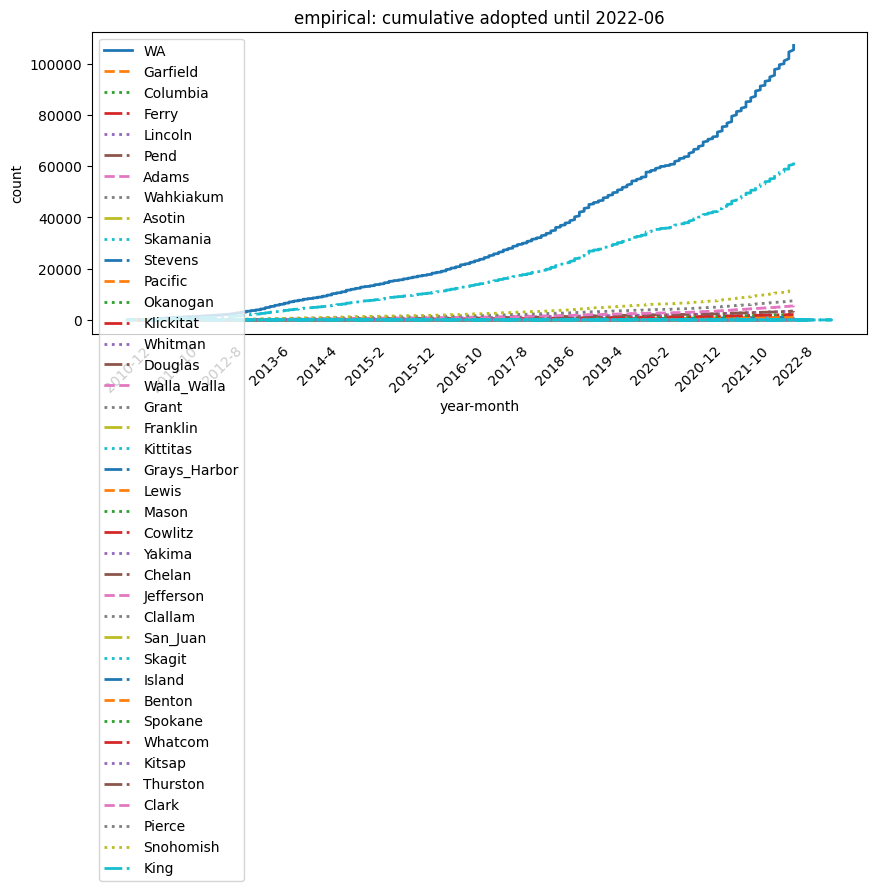

In [23]:
plt.figure(figsize=(10, 4), dpi=100)
windows_size = 3 # rolling average of three months

reg_avg = wa_reg_grouped_week['cum_reg'].rolling(window=3).mean()

plt.plot(wa_reg_grouped_week['year-month'], wa_reg_grouped_week['cum_reg'], '-', label='WA', linewidth=2)

plt.plot(Garfield_reg_grouped_week['year-month'], Garfield_reg_grouped_week['cum_reg'], '--', label='Garfield', linewidth=2)
plt.plot(Columbia_reg_grouped_week['year-month'], Columbia_reg_grouped_week['cum_reg'], ':' ,label='Columbia', linewidth=2)
plt.plot(Ferry_reg_grouped_week['year-month'], Ferry_reg_grouped_week['cum_reg'], '-.' ,label='Ferry', linewidth=2)
plt.plot(Lincoln_reg_grouped_week['year-month'], Lincoln_reg_grouped_week['cum_reg'], ':' ,label='Lincoln', linewidth=2)
plt.plot(Pend_Oreille_reg_grouped_week['year-month'], Pend_Oreille_reg_grouped_week['cum_reg'], '-.' ,label='Pend', linewidth=2)

plt.plot(Adams_reg_grouped_week['year-month'], Adams_reg_grouped_week['cum_reg'], '--', label='Adams', linewidth=2)
plt.plot(Wahkiakum_reg_grouped_week['year-month'], Wahkiakum_reg_grouped_week['cum_reg'], ':' ,label='Wahkiakum', linewidth=2)
plt.plot(Asotin_reg_grouped_week['year-month'], Asotin_reg_grouped_week['cum_reg'], '-.' ,label='Asotin', linewidth=2)
plt.plot(Skamania_reg_grouped_week['year-month'], Skamania_reg_grouped_week['cum_reg'], ':' ,label='Skamania', linewidth=2)
plt.plot(Stevens_reg_grouped_week['year-month'], Stevens_reg_grouped_week['cum_reg'], '-.' ,label='Stevens', linewidth=2)

plt.plot(Pacific_reg_grouped_week['year-month'], Pacific_reg_grouped_week['cum_reg'], '--', label='Pacific', linewidth=2)
plt.plot(Okanogan_reg_grouped_week['year-month'], Okanogan_reg_grouped_week['cum_reg'], ':' ,label='Okanogan', linewidth=2)
plt.plot(Klickitat_reg_grouped_week['year-month'], Klickitat_reg_grouped_week['cum_reg'], '-.' ,label='Klickitat', linewidth=2)
plt.plot(Whitman_reg_grouped_week['year-month'], Whitman_reg_grouped_week['cum_reg'], ':' ,label='Whitman', linewidth=2)
plt.plot(Douglas_reg_grouped_week['year-month'], Douglas_reg_grouped_week['cum_reg'], '-.' ,label='Douglas', linewidth=2)

plt.plot(Walla_Walla_reg_grouped_week['year-month'], Walla_Walla_reg_grouped_week['cum_reg'], '--', label='Walla_Walla', linewidth=2)
plt.plot(Grant_reg_grouped_week['year-month'], Grant_reg_grouped_week['cum_reg'], ':' ,label='Grant', linewidth=2)
plt.plot(Franklin_reg_grouped_week['year-month'], Franklin_reg_grouped_week['cum_reg'], '-.' ,label='Franklin', linewidth=2)
plt.plot(Kittitas_reg_grouped_week['year-month'], Kittitas_reg_grouped_week['cum_reg'], ':' ,label='Kittitas', linewidth=2)
plt.plot(Grays_Harbor_reg_grouped_week['year-month'], Grays_Harbor_reg_grouped_week['cum_reg'], '-.' ,label='Grays_Harbor', linewidth=2)

plt.plot(Lewis_reg_grouped_week['year-month'], Lewis_reg_grouped_week['cum_reg'], '--', label='Lewis', linewidth=2)
plt.plot(Mason_reg_grouped_week['year-month'], Mason_reg_grouped_week['cum_reg'], ':' ,label='Mason', linewidth=2)
plt.plot(Cowlitz_reg_grouped_week['year-month'], Cowlitz_reg_grouped_week['cum_reg'], '-.' ,label='Cowlitz', linewidth=2)
plt.plot(Yakima_reg_grouped_week['year-month'], Yakima_reg_grouped_week['cum_reg'], ':' ,label='Yakima', linewidth=2)
plt.plot(Chelan_reg_grouped_week['year-month'], Chelan_reg_grouped_week['cum_reg'], '-.' ,label='Chelan', linewidth=2)

plt.plot(Jefferson_reg_grouped_week['year-month'], Jefferson_reg_grouped_week['cum_reg'], '--', label='Jefferson', linewidth=2)
plt.plot(Clallam_reg_grouped_week['year-month'], Clallam_reg_grouped_week['cum_reg'], ':' ,label='Clallam', linewidth=2)
plt.plot(San_Juan_reg_grouped_week['year-month'], San_Juan_reg_grouped_week['cum_reg'], '-.' ,label='San_Juan', linewidth=2)
plt.plot(Skagit_reg_grouped_week['year-month'], Skagit_reg_grouped_week['cum_reg'], ':' ,label='Skagit', linewidth=2)
plt.plot(Island_reg_grouped_week['year-month'], Island_reg_grouped_week['cum_reg'], '-.' ,label='Island', linewidth=2)

plt.plot(Benton_reg_grouped_week['year-month'], Benton_reg_grouped_week['cum_reg'], '--', label='Benton', linewidth=2)
plt.plot(Spokane_reg_grouped_week['year-month'], Spokane_reg_grouped_week['cum_reg'], ':' ,label='Spokane', linewidth=2)
plt.plot(Whatcom_reg_grouped_week['year-month'], Whatcom_reg_grouped_week['cum_reg'], '-.' ,label='Whatcom', linewidth=2)
plt.plot(Kitsap_reg_grouped_week['year-month'], Kitsap_reg_grouped_week['cum_reg'], ':' ,label='Kitsap', linewidth=2)
plt.plot(Thurston_reg_grouped_week['year-month'], Thurston_reg_grouped_week['cum_reg'], '-.' ,label='Thurston', linewidth=2)

plt.plot(Clark_reg_grouped_week['year-month'], Clark_reg_grouped_week['cum_reg'], '--', label='Clark', linewidth=2)
plt.plot(Pierce_reg_grouped_week['year-month'], Pierce_reg_grouped_week['cum_reg'], ':' ,label='Pierce', linewidth=2)
plt.plot(Snohomish_reg_grouped_week['year-month'], Snohomish_reg_grouped_week['cum_reg'], ':' ,label='Snohomish', linewidth=2)
plt.plot(King_reg_grouped_week['year-month'], King_reg_grouped_week['cum_reg'], '-.' ,label='King', linewidth=2)

plt.legend()
plt.xticks(rotation = 45)
locs, labels = plt.xticks()
plt.title('empirical: cumulative adopted until 2022-06')
plt.xlabel('year-month')
plt.ylabel('count')

for label in labels:
    label.set_visible(False)
for label in labels[0::10]:
    label.set_visible(True)
    
plt.tick_params(top=False, bottom=False)

plt.show()

In [74]:
last_week = pd.read_csv('/Users/jarvis/CE253-EV-Adoption-Diffusion-Model-/Results/last_week.csv', index_col=0)
last_week = last_week.reset_index()

In [75]:
wa_county_cm = pd.read_csv('../Results/wa_county_cm.csv', index_col=0)
wa_county_cm.head()

,county,total_reg,week_to_cm
0,King,61608,213
1,Kitsap,3491,172
2,Thurston,3442,232
3,Pierce,7544,226
4,Clark,5556,236


In [76]:
wa_county_cm = wa_county_cm.sort_values(by='county', ascending=True)
wa_county_cm = wa_county_cm.reset_index()
wa_county_cm = wa_county_cm.merge(last_week, left_on='county', right_on='County')
wa_county_cm

,index_x,county,total_reg,week_to_cm,level_0,County,week,0,index_y,Population,ratio_to_pop
0,36,Adams,27,340,609,Adams,609.0,126.00,0,20576.0,0.006124
1,30,Asotin,33,270,1219,Asotin,609.0,34.45,1,21874.0,0.001575
2,14,Benton,1079,270,1829,Benton,609.0,1215.85,2,202355.0,0.006008
3,16,Chelan,467,273,2439,Chelan,609.0,286.70,3,73147.0,0.003920
4,13,Clallam,548,235,3049,Clallam,609.0,309.55,4,74037.0,0.004181
5,4,Clark,5556,236,3659,Clark,609.0,3189.50,5,462974.0,0.006889
6,33,Columbia,12,338,4269,Columbia,609.0,22.90,6,3683.0,0.006218
7,15,Cowlitz,486,259,4879,Cowlitz,609.0,458.80,7,93796.0,0.004891
8,21,Douglas,167,245,5489,Douglas,609.0,183.55,8,37659.0,0.004874
9,34,Ferry,20,361,6099,Ferry,609.0,0.00,9,10539.0,0.000000


In [77]:
wa_county_cm = wa_county_cm.sort_values(by='ratio_to_pop', ascending=False)
wa_county_cm = wa_county_cm.head(10)

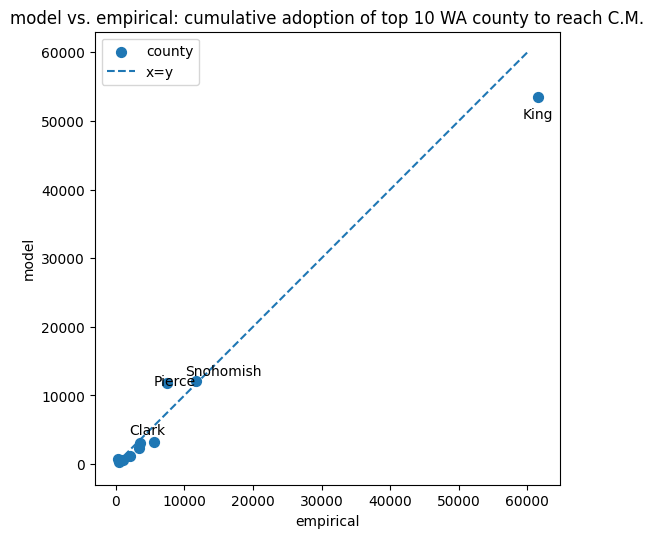

In [161]:
plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(wa_county_cm['total_reg'], wa_county_cm['0'], s=50, label='county')
plt.plot(np.arange(60000), np.arange(60000), '--', label='x=y')

for county in wa_county_cm['county']:
    if wa_county_cm[wa_county_cm['county'] == county].total_reg.iloc[0] > 5000:
        np.random.seed(90)
        plt.annotate(
            county, 
            (
                wa_county_cm[wa_county_cm['county'] == county].total_reg.iloc[0] + random.randint(-5000, 5000), 
                wa_county_cm[wa_county_cm['county'] == county]['0'].iloc[0] + random.randint(-5000, 5000)
            )
        )

plt.title('model vs. empirical: cumulative adoption of top 10 WA county to reach C.M.')
plt.ylabel('model')
plt.xlabel('empirical')
plt.legend()

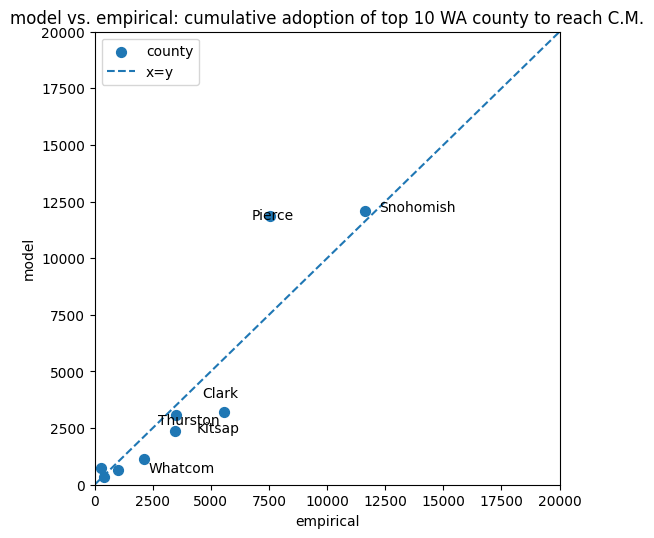

In [167]:
plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(wa_county_cm['total_reg'], wa_county_cm['0'], s=50, label='county')
plt.plot(np.arange(60000), np.arange(60000), '--', label='x=y')

for county in wa_county_cm['county']:
    if wa_county_cm[wa_county_cm['county'] == county].total_reg.iloc[0] > 1000:
        plt.annotate(
            county, 
            (
                wa_county_cm[wa_county_cm['county'] == county].total_reg.iloc[0] + random.randint(-1000, 1000), 
                wa_county_cm[wa_county_cm['county'] == county]['0'].iloc[0] + random.randint(-1000, 1000)
            )
        )

plt.xlim(0, 20000)
plt.ylim(0, 20000)
plt.title('model vs. empirical: cumulative adoption of top 10 WA county to reach C.M.')
plt.ylabel('model')
plt.xlabel('empirical')
plt.legend()